# Introducción a las prácticas de laboratorio de Deep Learning y sus Aplicaciones

## 1 - Un ejemplo sencillo: Exclusive-OR
### Objetivos
- Los datos: Crear, salvar y leer
- Primera red MLP con Keras

Tiempo estimado: 15 minutos

Evaluación: no hay

### Los datos: Crear, salvar y leer.
Usaremos, siempre que sea posible, ficheros con datos en formato csv (valores separados por comas, aunque puede que en vez de comas se usen otros caracteres, como ';', ó tabuladores...). Este formato de datos es sencillo y admitido por casi todas las plataformas. Desde luego hay otras posibilidades que el lenguaje Python admite de manera igualmente sencilla, pero en algunos casos implica tener instalado otro software (como gestores de bases datos).

Para alojar los datos en Python usaremos arrays (numpy) o DataFrames (pandas), aunque también es posible usar listas, diccionarios, tuplas...

In [14]:
# Algo a muy bajo nivel, tan solo para ver cómo se puede hacer, pero este enfoque está desaconsejado...

# Crear un fichero con los datos del XOR

fpOut = open ("DatosXOR.csv", "w")

for x in [0.0, 1.0]:
  for y in [0.0, 1.0]:
    if (x + y == 0) or (x+y == 2):
      z = 0.0
    else:
      z = 1.0

    linea = str (x)+";"+str (y) + ";"+str (z)+'\n'
    fpOut.write (linea)
    print (linea, end='') # La línea ya contiene un retorno de carro.

fpOut.close()

# Para leerlo:

print ("Leemos el fichero línea a línea:")

fpIn = open ("DatosXOR.csv", "r")
for linea in fpIn:
  print (linea, end='') # La línea ya contiene un retorno de carro.

fpIn.close ()

0.0;0.0;0.0
0.0;1.0;1.0
1.0;0.0;1.0
1.0;1.0;0.0
Leemos el fichero línea a línea:
0.0;0.0;0.0
0.0;1.0;1.0
1.0;0.0;1.0
1.0;1.0;0.0


En las celdas anteriores no hicimos referencia a funciones de paquetes específicos, pero para las siguientes es necesario importar determinados paquetes.

Agrupamos todas las dependencias de nuestro código Python en esta celda.

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.compat.v1 as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import History

from tensorflow.keras.layers import Dense, Dropout, Activation

In [16]:
print (pd.__version__)
print (np.__version__)
print (sns.__version__)
print (matplotlib.__version__)
print (tf.__version__)

2.2.2
2.0.2
0.13.2
3.10.0
2.19.0


In [17]:
# Cargar los datos en un DataFrame
dfXOR=pd.read_csv ("DatosXOR.csv", delimiter=';', header=None)
dfXOR.columns=["x", "y", "z"]
dfXOR

,x,y,z
0,0.0,0.0,0.0
1,0.0,1.0,1.0
2,1.0,0.0,1.0
3,1.0,1.0,0.0


In [18]:
# Pasar los datos a un array
arrayXOR=np.array (dfXOR)
arrayXOR

array([[0., 0., 0.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

In [19]:
# Las RN van a necesitar que los datos de entrada y de salida estén en arrays separados.
# Sepaamos entradas y salida

print ("Entradas")
arrayEntradas=arrayXOR[:,[0,1]]
print (arrayEntradas)
print ("Es un array (vector) que contiene los arrays (vectores) de entradas")
print (type (arrayEntradas))

print ("Salidas")
arraySalidas=arrayXOR[:,[2]]
print (arraySalidas)
print ("Es un array que contiene los arrays de salidas")

Entradas
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Es un array (vector) que contiene los arrays (vectores) de entradas
<class 'numpy.ndarray'>
Salidas
[[0.]
 [1.]
 [1.]
 [0.]]
Es un array que contiene los arrays de salidas


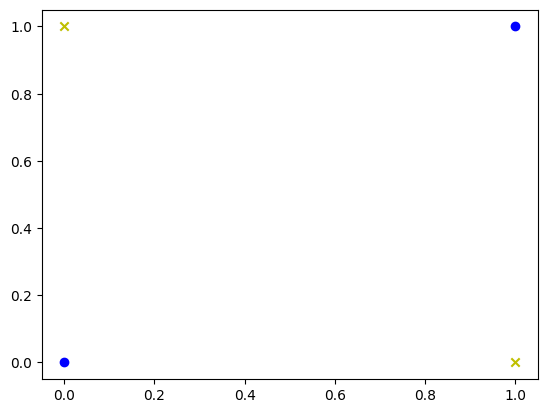

In [20]:
# Siempre es interesante hacer gráficas de los datos

z0=dfXOR[dfXOR.z == 0]  # Conjunto de datos con salida 0
z1=dfXOR[dfXOR.z == 1]  # Conjunto de datos con salida 1

plt.scatter (z0.iloc[:,0], z0.iloc[:,1], c='b', marker='o')
plt.scatter (z1.iloc[:,0], z1.iloc[:,1], c='y', marker='x')

### La primera red neuronal

In [21]:
# Vamos a hacer un seguimiento del aprendizaje por medio de la opción callbacks.
history = History ()

model = Sequential()
# La capa oculta
model.add(layers.Dense(2, input_dim=2, activation="tanh", name="Oculta"))
# La capa de salida
model.add(layers.Dense(1, activation="sigmoid",name="Salida"))

# Seleccionamos el optimizador: Gradiente Decreciente Simple,
# con un coeficiente de aprendizaje 0.1 (parámetro ajustale)
sgd = SGD(learning_rate=0.1)

# Creamos el modelo, indicando cuál va a ser el tipo de función pérdida. En este caso,
# al ser una clasificación binaria, usamos binary_corssentropy
model.compile(loss='binary_crossentropy', optimizer=sgd)

# Entrenamos/ajustamos el modelo.
# Observa que especificamos el número de épocas de entrenamiento que vamos a usar
model.fit(arrayEntradas, arraySalidas, epochs=500, verbose=0, callbacks=[history])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


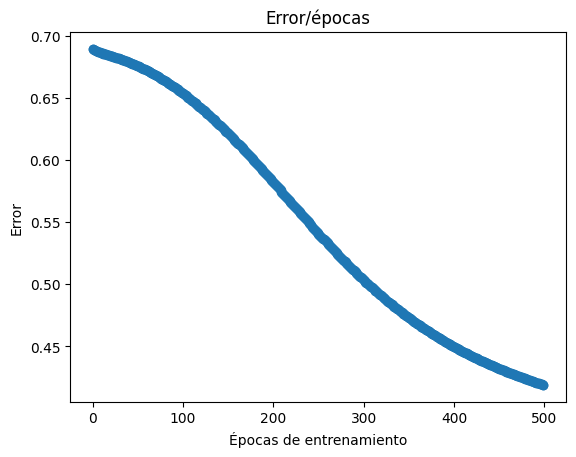

In [22]:
# Obtenemos del objeto history la evolución del error (loss) a lo laro de las distintas épocas de entrenamiento
# y las representamos para ver si hemos conseguido que la red aprenda los ejemplos:
epochs=history.epoch
loss=history.history['loss']
plt.title ("Error/épocas")
plt.xlabel ("Épocas de entrenamiento")
plt.ylabel ("Error")
plt.scatter (epochs, loss)

In [23]:
# Observa que a partir de las 2000 épocas ya el error (loss) de aprendizaje no varía mucho.


In [38]:
# Otra forma muy interesante de visualizar los resultados es mediante un mapa de temperatura

Pasos=5
x0=np.linspace (0., 1.0, Pasos)
y0=np.linspace (0., 1.0, Pasos)

print (x0, y0)

SalidaPrueba = np.empty (0)

for x_prueba in x0:
  for y_prueba in y0:
    EntradaPrueba=[float(x_prueba), float(y_prueba)]

    print ("Entrada = ", EntradaPrueba)

    z=model.predict (np.array(0.0, 0.0))
    SalidaPrueba=np.append (SalidaPrueba, z)

plt.contourf (x0, y0, SalidaPrueba.reshape (Pasos, Pasos), 5)
barra=plt.colorbar()

[0.   0.25 0.5  0.75 1.  ] [0.   0.25 0.5  0.75 1.  ]
Entrada =  [0.0, 0.0]


TypeError: Cannot interpret '0.0' as a data type

In [ ]:
# También puede ser muy interesante visualizar la red.
import tensorflow as tf

dot_img_file = 'tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
model.summary()

### Selección de Hiperparámetros
Vamos a buscar la mejor combinación de elementos de proceso en la capa oculta y de coeficiente de aprendizaje.
Utiliza una rejilla (param grid)

In [ ]:
ep_capa_oculta= (np.linspace(2,40,5)).astype (int)
num_ep=len (ep_capa_oculta)
lcoef=np.linspace (0.01, 0.2,5)
num_lc=len (lcoef)

resultados = []

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

subplot = 0

for ep in ep_capa_oculta:
  for lc in lcoef:
    etiqueta="ep="+str(ep)+" lc="+"%.3f"%lc
    print (etiqueta, end=' ')

    history = History ()

    model = Sequential()
    model.add(Dense(ep, input_dim=2))
    model.add(Activation('tanh'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    sgd = SGD(learning_rate=lc)
    model.compile(loss='binary_crossentropy', optimizer=sgd)

    model.fit(arrayEntradas, arraySalidas, epochs=750, verbose=0, callbacks=[history])

    epochs=history.epoch
    loss=history.history['loss']

    print ("%.3f"%loss [-1])

    resultados.append (loss [-1])

    subplot=subplot+1

    ax = fig.add_subplot (num_ep,num_lc,subplot)

    #ax = fig.add_subplot (111)

    ax.scatter (epochs, loss)
    ax.set_title(etiqueta, size=8)

fig.show()

In [ ]:
# Una alternativa sencilla para visualizar los resultados

resultados_tmp=np.reshape(resultados, (num_ep, num_lc))

df_resultados=pd.DataFrame (resultados_tmp, index=ep_capa_oculta, columns=lcoef)

plt.pcolor (df_resultados)
plt.colorbar()
plt.xlabel("lr")
plt.ylabel("ep")

plt.show()

In [ ]:
# Otra alternativa más espectacular
sns.heatmap(df_resultados, annot=True)